# Efficiency test for Container Polygon's algorithm

In this notebook we will use the three differents algorithms developed to find the container polygon of an arbitrary point in space.

We will show the time elapsed in each of them.

Let's load the files that will be used in this notebook.

In [1]:
include("Operaciones_Basicas.jl")
include("Red_Dual.jl")
include("Separacion_Arreglos_X_Y.jl")
include("Generador_Vecindades_Pto_Arbitrario.jl")
include("Dentro_Fuera_Poligono.jl")
include("Algoritmo_Radio.jl")
include("Algoritmo_Voronoi.jl")
include("Algoritmo_Sin_Acotar.jl")
include("voronoi.jl")

getVoronoiDiagram (generic function with 1 method)

We will use the package "Plots" to visualize the polygons of the Neighborhood and the Voronoi's polygons. So, let's load it.

In [2]:
using Plots

### Information about the Quasiperiodic Lattice

Create the information of the star vectors required by the GDM algorithm, which determine the symmetry of the quasiperiodic lattice. Also, generate the array that contains the alpha constants and the array with the average distance between stripes.

In [3]:
NSides = 121; #Symmetry of the quasiperiodic lattice
Star_Vectors = [[BigFloat(1),0]]; #Array wich will contain the Star Vectors
for i in 1:(NSides-1)
    push!(Star_Vectors, [cos((2*i)*pi/NSides), sin((2*i)*pi/NSides)]); #Complete the Star_Vector Array
end
Alphas_Array = fill(0.2, NSides); #Array of the alphas constant
Average_Distance_Stripes = fill(NSides/2, NSides); #Array with the average distance between stripes

### Three metods to get container polygon

First, let's generate the neighborhood of the quasiperiodic lattice around an arbitrary point.

The three metods will work with the same point.

In [4]:
N = 0; #The margin of error to consider

SL = 1e10; #Size of a half side of the square in which the algorithm generate a random point inside it

#Let's generate the arbitrary point around which we will generate the neighborhood
APoint = Float64[]; #An Float64 array that will held the coordinates of the arbitrary point

#Generate two random numbers that will determine in which cuadrant will be the arbitrary point
x = rand();
y = rand();

if (x > 0.5) && (y > 0.5)
    APoint = [rand()*SL, rand()*SL];
elseif (x > 0.5) && (y < 0.5)
    APoint = [rand()*SL, -rand()*SL];
elseif (x < 0.5) && (y > 0.5)
    APoint = [-rand()*SL, rand()*SL];
elseif (x < 0.5) && (y < 0.5)
    APoint = [-rand()*SL, -rand()*SL];
end

2-element Array{Float64,1}:
 -3.8826711135239587e9
  2.682006397170946e9 

In [8]:
#Let's get the Neighborhood around an arbitrary point without any special algorithm
@time Dual_Points = region_Local(N, Average_Distance_Stripes, Star_Vectors, Alphas_Array, APoint);

  1.793397 seconds (31.60 M allocations: 1.714 GiB, 27.11% gc time)


In [9]:
Radius = 2; #Size of the radius to use at the circle centered in the point of interest

#Let's get the Neighborhood around an arbitrary point with Radius algorithm
@time Dual_Points_R = region_Local_Radio(N, Radius, Average_Distance_Stripes, Star_Vectors, Alphas_Array, APoint);

  1.777928 seconds (31.94 M allocations: 1.730 GiB, 23.51% gc time)


In [10]:
#Let's get the Neighborhood around an arbitrary point with Voronoi algorithm
@time Dual_Points_V = region_Local_Voronoi(N, Average_Distance_Stripes, Star_Vectors, Alphas_Array, APoint); #Algoritmo Voronoi

  1.842946 seconds (31.60 M allocations: 1.714 GiB, 26.14% gc time)


Now, let's find the container polygon and visualize it.

Without special algorithm
  0.293184 seconds (2.08 M allocations: 97.169 MiB, 55.92% gc time)


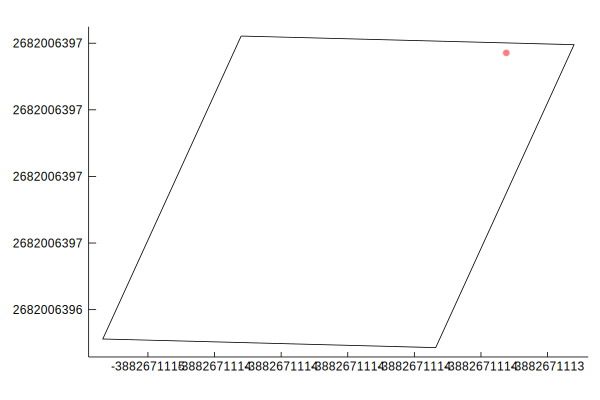

In [14]:
println("Without special algorithm")
#Let's split the vertices coordinates in X coordinates and Y coordinates
X, Y = separacion_Arreglo_de_Arreglos_2D(Dual_Points);

#Let's obtain the vertices (P1,P2,P3,P4) of the container polygon
@time Vertices_Container_Polygon = poligono_Contenedor(X, Y, APoint);

#Let's visualize the container polygon
plot()
plot([Vertices_Container_Polygon[1][1], Vertices_Container_Polygon[2][1], Vertices_Container_Polygon[3][1], Vertices_Container_Polygon[4][1], Vertices_Container_Polygon[1][1]], [Vertices_Container_Polygon[1][2], Vertices_Container_Polygon[2][2], Vertices_Container_Polygon[3][2], Vertices_Container_Polygon[4][2], Vertices_Container_Polygon[1][2]], markersize = 0.2, key = false, aspect_ratio=:equal, grid = false, color =:black)
scatter!([APoint[1]], [APoint[2]], markersize = 5, markeralpha = 0.5, markerstrokewidth = 0, markercolor = :red)

Radius Algorithm
  0.000880 seconds (11.05 k allocations: 526.938 KiB)


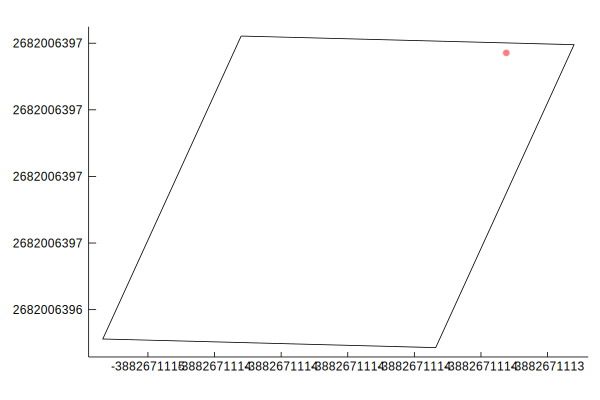

In [15]:
println("Radius Algorithm")
#Let's split the vertices coordinates in X coordinates and Y coordinates
X_R, Y_R = separacion_Arreglo_de_Arreglos_2D(Dual_Points_R);

#Let's obtain the vertices (P1,P2,P3,P4) of the container polygon
@time Vertices_Container_Polygon_R = poligono_Contenedor_Radio(X_R, Y_R, APoint);

#Let's visualize the container polygon
plot()
plot([Vertices_Container_Polygon_R[1][1], Vertices_Container_Polygon_R[2][1], Vertices_Container_Polygon_R[3][1], Vertices_Container_Polygon_R[4][1], Vertices_Container_Polygon_R[1][1]], [Vertices_Container_Polygon_R[1][2], Vertices_Container_Polygon_R[2][2], Vertices_Container_Polygon_R[3][2], Vertices_Container_Polygon_R[4][2], Vertices_Container_Polygon_R[1][2]], markersize = 0.2, key = false, aspect_ratio=:equal, grid = false, color =:black)
scatter!([APoint[1]], [APoint[2]], markersize = 5, markeralpha = 0.5, markerstrokewidth = 0, markercolor = :red)

Voronoi's Algorithm
  0.320412 seconds (1.17 M allocations: 34.343 MiB, 7.14% gc time)


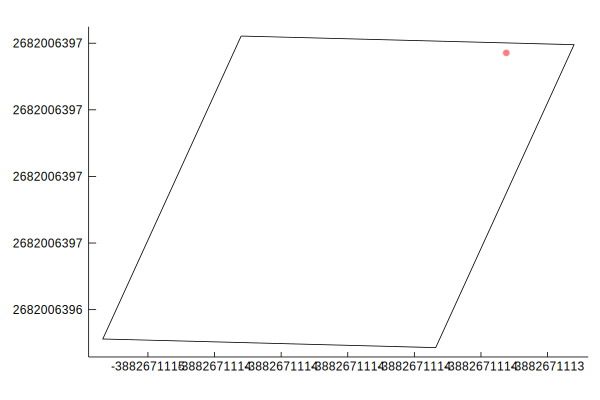

In [16]:
println("Voronoi's Algorithm")
#Let's obtain the polygon structure of the container polygon (as a 4 segment/sides)
@time Vertices_Container_Polygon_V = poligono_Contenedor_Voronoi(Dual_Points_V, APoint);

#Let's visualize the container polygon
plot()
plot([Vertices_Container_Polygon_V[1].inicio[1], Vertices_Container_Polygon_V[2].inicio[1], Vertices_Container_Polygon_V[3].inicio[1], Vertices_Container_Polygon_V[4].inicio[1], Vertices_Container_Polygon_V[1].inicio[1]], [Vertices_Container_Polygon_V[1].inicio[2], Vertices_Container_Polygon_V[2].inicio[2], Vertices_Container_Polygon_V[3].inicio[2], Vertices_Container_Polygon_V[4].inicio[2], Vertices_Container_Polygon_V[1].inicio[2]], markersize = 0.2, key = false, aspect_ratio=:equal, grid = false, color =:black)
scatter!([APoint[1]], [APoint[2]], markersize = 5, markeralpha = 0.5, markerstrokewidth = 0, markercolor = :red)